# Диаграмма классов

Диаграмма классов (англ. class diagram) — структурная диаграмма языка моделирования UML (Unified Modeling Language — унифицированный язык моделирования), демонстрирующая общую структуру иерархии классов системы, атрибутов (полей), методов, интерфейсов и взаимосвязей (отношений) между ними. 

Широко применяется не только для документирования и визуализации, но также для конструирования посредством прямого или обратного проектирования. То есть есть два способа использования таких диаграмм:  
1. Сначала написать код, а потом построить диаграмму, для документирования и визуализации
2. Сначала спроектировать структуру, а потом написать по плану код

In [30]:
#Код для генерации диаграмм, не обращайте внимание
import base64
import io, requests
from IPython.display import Image, display
from PIL import Image as im
import matplotlib.pyplot as plt

def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.urlsafe_b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    img = im.open(io.BytesIO(requests.get('https://mermaid.ink/img/' + base64_string).content))
    plt.imshow(img)
    plt.axis('off') # allow to hide axis
    plt.savefig('image.png', dpi=1200)


# Некоторые из связей в UML-диаграмме классов:

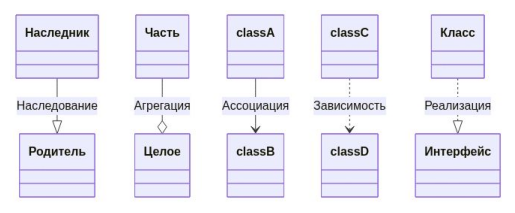

In [31]:
# Те самые диаграммы. Написаны с помощью mermaid.js
mm('''
classDiagram
Наследник --|> Родитель : Наследование
Часть --o Целое : Агрегация
classA --> classB : Ассоциация
classC ..> classD : Зависимость
Класс ..|> Интерфейс : Реализация''')

## Наследование

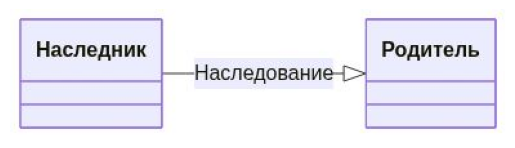

In [32]:
mm('''
classDiagram
direction LR
    Наследник --|> Родитель : Наследование
''')

In [33]:
class Roditel:
    pass

class Naslednik(Roditel):
    pass

## Агрегация

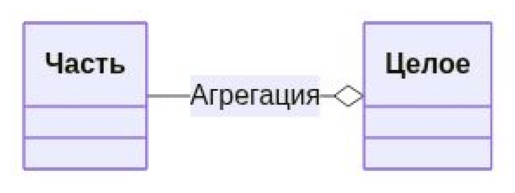

In [34]:
mm('''
classDiagram
direction LR
    Часть --o Целое : Агрегация
''')

In [35]:
class Chast:
    pass

class Tseloe:
    chast: Chast
    def __init__(self, chast:Chast):
        self.chast=chast

c:Chast=Chast()
t:Tseloe=Tseloe(c)

## Ассоциация

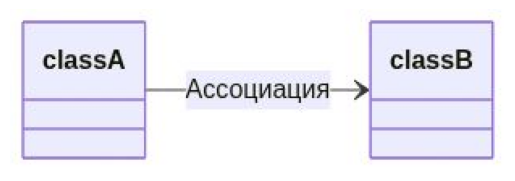

In [36]:
mm('''
classDiagram
direction LR
    classA --> classB : Ассоциация
''')

Ассоциация показывает, что два класса взаимодействуют друг с другом, но при этом не являются наследниками или родственниками и не зависят друг от друга. Ассоциация может включать в себя в том числе и Агрегацию. 

## Зависимость
Логика одного класса зависит от другого класса

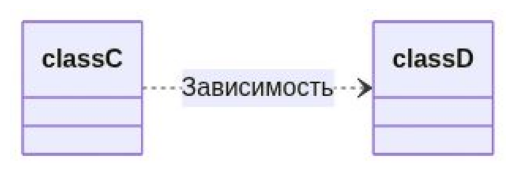

In [37]:
mm('''
classDiagram
direction LR
    classC ..> classD : Зависимость
''')

In [38]:
class Book:
    title:str="Заголовок"

class Person:
    def read(self, book:Book):
        print(book.title)

p:Person=Person()
b:Book=Book()
p.read(b)
b.title="Другой заголовок"
p.read(b)

Заголовок
Другой заголовок


## Реализация

Наследование и реализация (добавление логики) родительского класса. Обычно к абстрактным классам и интерфейсам.

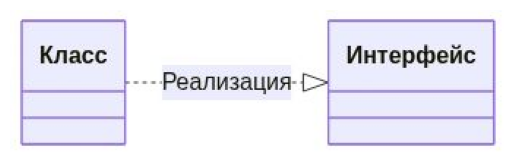

In [39]:
mm('''
classDiagram
direction LR
    Класс ..|> Интерфейс : Реализация
''')

In [40]:
import abc
class SpeakInterface(abc.ABC):
    @abc.abstractmethod
    def speak(self):
        pass

class Dog(SpeakInterface):
    def speak(self):
        print("Гав")


# Примеры

## Прямое наследование: Cylinder как подкласс Circle.

Такой подход можно использовать, если мы считаем, что цилиндр – это специализированная версия круга, например, при моделировании объектов, где для цилиндра все особенности круга важны.  
В такой концепции считается что Цилиндр является Кругом. Отношение «is a»

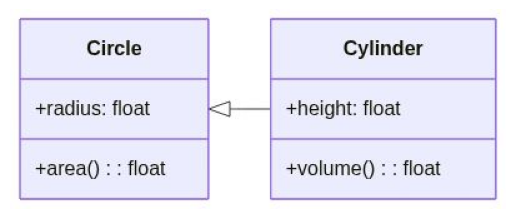

In [41]:
mm('''
classDiagram
direction LR
    class Circle {
        +radius: float
        +area(): float
    }
    class Cylinder {
        +height: float
        +volume(): float
    }
    Circle <|-- Cylinder''')

## Общее базовое тело

Может быть Круг и Цилиндр не являются наследниками друг друга, а просто родственниками? Такой вариант полезен, если необходимо обрабатывать круги и цилиндры как объекты одного семейства.

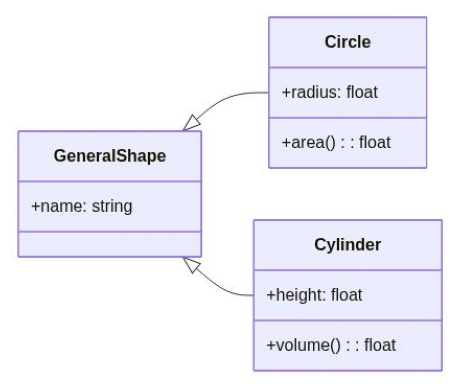

In [42]:
mm('''
classDiagram
    direction LR
    class GeneralShape {
        +name: string
    }
    class Circle {
        +radius: float
        +area(): float
    }
    class Cylinder {
        +height: float
        +volume(): float
    }
    GeneralShape <|-- Circle
    GeneralShape <|-- Cylinder''')


## Композиция: Cylinder содержит Circle

Можно использовать логику круга внутри цилиндра и экономить на повторяющемся коде. Такой подход верно отражает структуру объектов в реальном мире: цилиндр содержит круг.

У переменной base тип GeneralShape, то есть Cylinder может содержать не только Круг, но и другие дочерние классы GeneralShape. 

Например мы можем создать Цилиндр с основанием треугольника или квадрата, хотя с точки зрения геометрии это будет уже не цилиндр, но принцип вычисления объёма останется тот же.

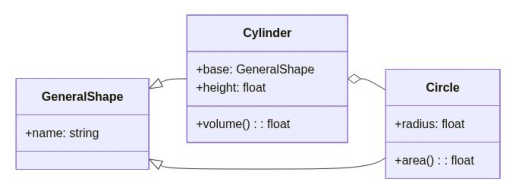

In [43]:
mm('''
classDiagram
    direction LR
    class Circle {
        +radius: float
        +area(): float
    }
    class Cylinder {
        +base: GeneralShape
        +height: float
        +volume(): float
    }
    class GeneralShape {
        +name: string
    }
    Cylinder o-- Circle
    GeneralShape <|-- Circle
    GeneralShape <|-- Cylinder
''')

## Интерфейс: ICircularShape реализуется и Circle, и Cylinder

Если у классов должны быть одинаковые свойства, то мы можем присвоить их с помощью интерфейсов.

В Python интерфейс создается просто как абстрактный класс

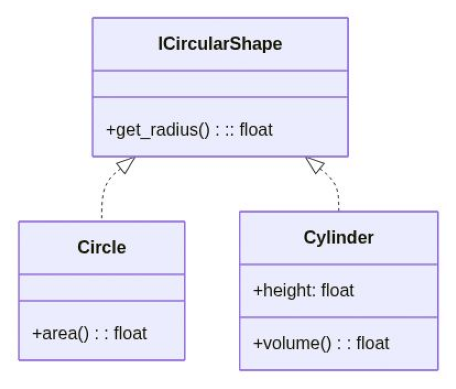

In [44]:
mm('''
classDiagram
    class ICircularShape {
        +get_radius():: float
    }
    class Circle {
        +area(): float
    }
    class Cylinder {
        +height: float
        +volume(): float
    }
    ICircularShape <|.. Circle
    ICircularShape <|.. Cylinder
''')